# 3.3: Hypothesis Testing

***Runtime: ~15 mins***

*In this section I am using GridSearchCV to find the best performing models for each dataset. For the Stars dataset, the model that is tested is the **LogisticRegression** model and for the GWP dataset - **GradientBoostingRegressor**. When the best model has been found, appropriate graphs and statistics are displayed for the final model for each dataset. Additionally, hypothesis testing is performed between the models in Task 3.2 and the ones in this task.*

## Importing required libraries & modules
*Modules required for this task are impored below.*

In [1]:
import numpy as np
from ipynb.fs.defs.task3_1 import load_dataset, encode_dataset, simple_imputer,\
    iterative_imputer, scale_data, select_best_features
from ipynb.fs.defs.task3_2 import split_dataset, plot_prediction_results
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_rel, ttest_ind
from sklearn.svm import SVC, SVR

## Load and pre-process datasets
*Datasets are loaded and pre-processed using functions from Task 3.1*

In [2]:
def pre_process_dataset(name: str, features_count: int,\
                        categorical_data: bool=False) -> np.ndarray:
    """
    Function that returns the pre-processed dataset using functions
    from task3_1.ipynb that import, encode, replaces missing values
    and selects best features from it.
    
    Args:
        name (str): The name of the dataset to import
        features_count (int): The number of features to select from 
            the dataset
        categorical_data (bool): If only categories should be imputed
            using Simple Imputer
    
    Returns:
        np.ndarray: The pre-processed dataset
    """
    
    dataset = load_dataset(name)
    encoded_set_info = encode_dataset(dataset, 'one-hot-encoder')
    encoded_dataset = encoded_set_info[0]
    imputed_dataset = iterative_imputer(simple_imputer(encoded_dataset,\
                                encoded_set_info[1], only_categories=True))
    scalled_dataset = scale_data(imputed_dataset, 'min-max')
    best_features_dataset = select_best_features(scalled_dataset, features_count,\
                                                 categorical_data)
    
    return best_features_dataset

In [3]:
# Assign pre-processed datasets
if __name__ == "__main__":
    stars_dataset = pre_process_dataset('star_assessment.csv', 12, categorical_data=True)
    gwp_dataset = pre_process_dataset('gwp_assessment.csv', 5)

## Splitting datasets into training and testing
*Datasets are split into training and testing subsets with either 80/20 ratio for large datasets or 70/30 for smaller ones.*

In [4]:
# Split datasets
if __name__ == "__main__":
    x_train_stars, x_test_stars, y_train_stars, y_test_stars = split_dataset(stars_dataset, 0.2)
    x_train_gwp, x_test_gwp, y_train_gwp, y_test_gwp = split_dataset(gwp_dataset)

## Finding optimal hyper-parameters using GridSearchCV
*To find the best-performing hyper-parameters for both models used, namely **GradientBoostingRegressor** for the GWP dataset and **LogisticRegression** for the Stars dataset, I am using **GridSearchCV**. It works by performing exhaustive search over specified hyper-parameters on each model and evaluates their performances. I am using **KFold** which further splits each dataset into k consecutive folds, where each fold is used to train a model.* \
*Since a model could take long time to run, to optimise the runtime, I have added `n_jobs=-1` parameter to the **GridSearchCV** which utilizes the **maximum** number of CPU cores to achieve parallelizing and maximum efficiency.*

In [5]:
def return_optimal_model(model: (GradientBoostingRegressor, LogisticRegression), \
                         dataset: np.ndarray, param_grid: dict, cv: int=5) -> list:
    """
    Function that will test a range of hyper-parameters using both
    models to find the optimal parameters that produce the best result.
    Returns configuration of best model, list of parameters tested,
    list of mean scores from each test, list of std scores from each test.
    
    Args:
        model (GradientBoostingRegressor, LogisticRegression): The model on which
            hyper-parameters should be tested
        dataset (np.ndarray): The dataset with which tests should be conducted
        param_grid (dict): The parameters which should be tested
        cv (int): The number of cross-validations to be performed for each
            parameter tested
    
    Returns: 
        list
            [0]: best parameters from the search
            [1]: list of all parameters tested
            [2]: mean scores from testing
            [3]: standard deviation scores from testing
    """
    
    grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(dataset[:,:-1], dataset[:,-1])
    
    return[
        grid_search.best_params_,
        grid_search.cv_results_['params'],
        grid_search.cv_results_['mean_test_score'],
        grid_search.cv_results_['std_test_score']
    ]

## Stars dataset: Finding optimal hyper-parameters for *LogisticRegression* model
*Testing list of parameters on the **LogisticRegression** model to find the best performing one.*

In [6]:
# Running hyper-parameter optimisation on the start set
if __name__ == "__main__":
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [1, 10, 25],
        'solver': ['saga', 'liblinear', 'newton-cg']
    }

    best_model_stars, tested_stars, mean_scores_stars,\
    std_scored_stars = return_optimal_model(LogisticRegression(), stars_dataset, param_grid)

/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/an

## Stars dataset: Visualise results from hyper-parameters optimisation

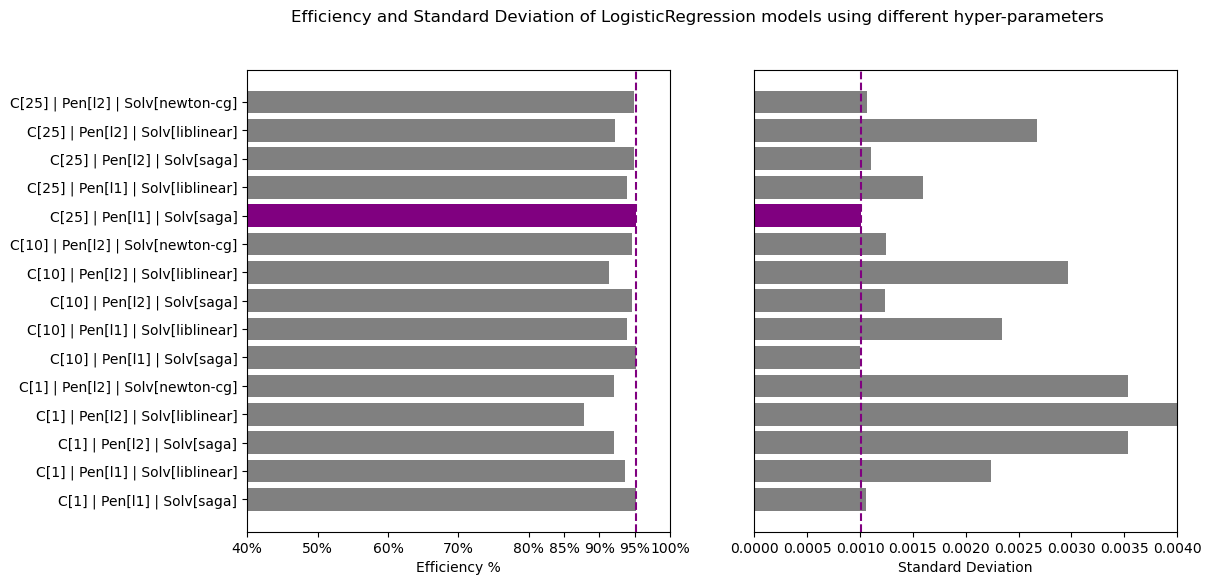

In [7]:
# Visualise results from hyper-parameters
if __name__ == "__main__":
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    tested_stars = np.delete(tested_stars, np.where(np.isnan(mean_scores_stars))[0])
    mean_scores_stars = mean_scores_stars[~np.isnan(mean_scores_stars)]
    std_scored_stars = std_scored_stars[~np.isnan(std_scored_stars)]
    
    labels = ["C[{0}] | Pen[{1}] | Solv[{2}]".format(d['C'], d['penalty'], d['solver']) for d in tested_stars]
    colors = ['grey'] * len(tested_stars)
    colors[np.where(tested_stars == best_model_stars)[0][0]] = 'purple'
    
    ax1.barh(labels, mean_scores_stars, color=colors)
    ax1.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0])
    ax1.set_xticklabels(['40%', '50%', '60%', '70%', '80%', '85%', '90%', '95%', '100%'])
    ax1.set_xlim(0.4, 1.0)
    ax1.axvline(x=mean_scores_stars.max(), color='purple', linestyle='--')
    ax1.set_xlabel('Efficiency %')
    
    ax2.barh(labels, std_scored_stars, color=colors)
    ax2.set_xlabel('Standard Deviation')
    ax2.set_xlim(0, 0.004)
    ax2.yaxis.set_visible(False) 
    ax2.axvline(x=std_scored_stars[np.where(tested_stars == best_model_stars)[0][0]], color='purple', linestyle='--')

    fig.suptitle('Efficiency and Standard Deviation of LogisticRegression models using different hyper-parameters')
    plt.show()

## Stars dataset: Conclusion from results
*As we can see from the hyper-parameters optimisation the **LogisticRegression** model with parameters **C=25**, **Penalty=L1** and **Solver=saga** is the best performing model with efficiency of 95% and standard deviation 0.00096. However, the model with parameters **C=10**, **Penalty=L1** and **Solver=saga** has similar results and slightly lower standard deviation of 0.00089, meaning that it should not be disregarded immediately and further testing for the optimal model between the two should be conducted.*

/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


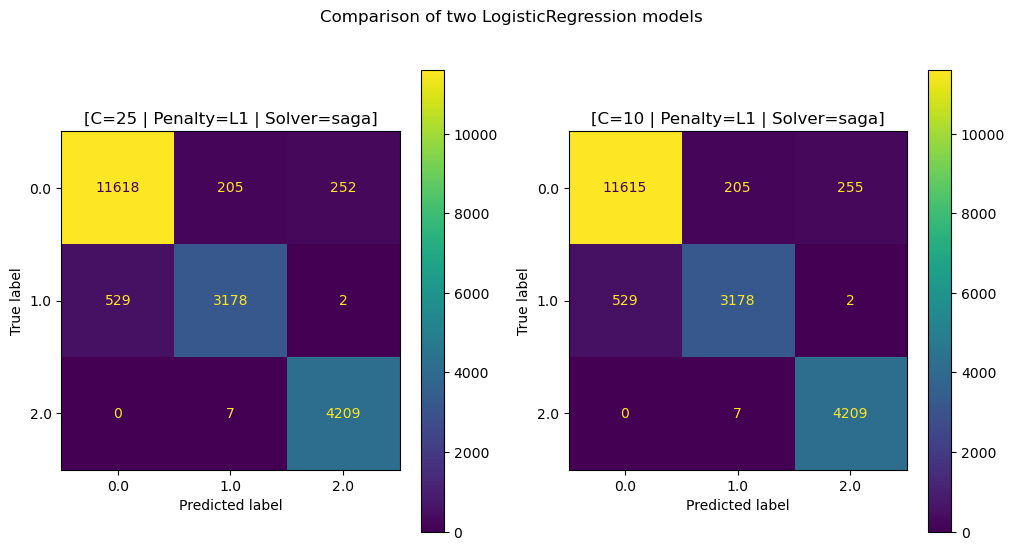

In [18]:
# Run the final two models for stars dataset and show ConfusionMatrices
if __name__ == "__main__":
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Create and fit the first optimal model
    lr = LogisticRegression(C=25, penalty='l1', solver='saga')
    lr.fit(x_train_stars, y_train_stars)
    y_pred_stars = lr.predict(x_test_stars)
    lr.score(x_test_stars, y_test_stars)
    
    cm1 = ConfusionMatrixDisplay.from_predictions(y_test_stars, y_pred_stars, ax=axs[0])
    cm1.ax_.set_title('[C=25 | Penalty=L1 | Solver=saga]')
    
    # Create and fit the second optimal model
    lr2 = LogisticRegression(C=10, penalty='l1', solver='saga')
    lr2.fit(x_train_stars, y_train_stars)
    y_pred_stars = lr2.predict(x_test_stars)
    lr2.score(x_test_stars, y_test_stars)
    
    cm2 = ConfusionMatrixDisplay.from_predictions(y_test_stars, y_pred_stars, ax=axs[1])
    cm2.ax_.set_title('[C=10 | Penalty=L1 | Solver=saga]')
    
    fig.suptitle('Comparison of two LogisticRegression models')
    plt.show()

*Overall, the model with parameters **C=25**, **Penalty=L1** and **Solver=saga** performs better, when it comes to predicting the right label in class 0, than the model with parameters **C=10**, **Penalty=L1** and **Solver=saga** meaning that it is overal the better performing model and final choice for this dataset.*

## Gwp dataset: Finding optimal hyper-parameters for *GradientBoostingRegressor* model
*Testing list of parameters on the **GradientBoostingRegressor** model to find the best performing one.*

In [9]:
# Running hyper-parameter optimisation on the start set
if __name__ == "__main__":
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [2, 3, 4],
        'learning_rate': [0.1, 0.01],
        'loss': ['huber', 'squared_error']
    }

    best_model_gwp, tested_gwp, coef_scores_gwp,\
    std_scored_gwp = return_optimal_model(GradientBoostingRegressor(), gwp_dataset, param_grid)

## Gwp dataset: Visualise results from hyper-parameters optimisation

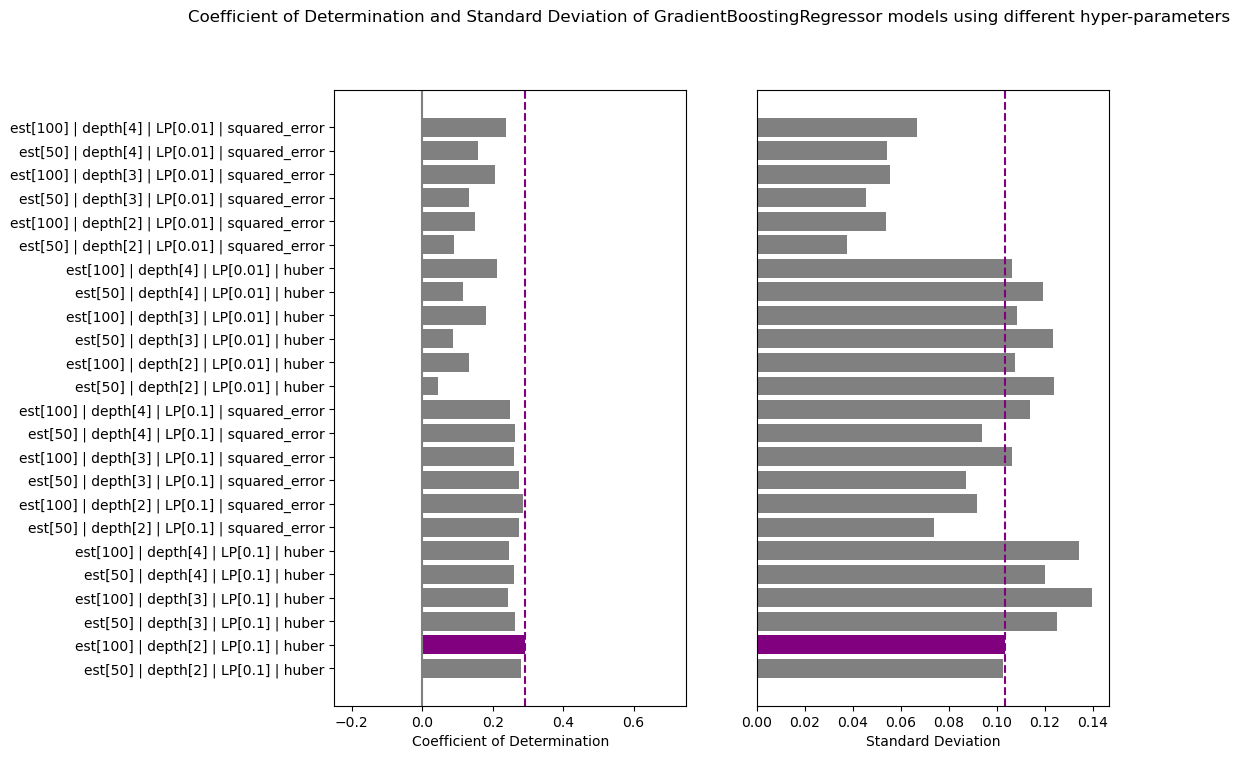

In [10]:
# Visualise results from hyper-parameters
if __name__ == "__main__":
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    
    tested_gwp = np.delete(tested_gwp, np.where(np.isnan(coef_scores_gwp))[0])
    coef_scores_gwp = coef_scores_gwp[~np.isnan(coef_scores_gwp)]
    std_scored_gwp = std_scored_gwp[~np.isnan(std_scored_gwp)]

    labels = ["est[{0}] | depth[{1}] | LP[{2}] | {3}".format(d['n_estimators'],\
                d['max_depth'], d['learning_rate'], d['loss']) for d in tested_gwp]
    colors = ['grey'] * len(tested_gwp)
    colors[np.where(tested_gwp == best_model_gwp)[0][0]] = 'purple'

    ax1.barh(labels, coef_scores_gwp, color=colors)
    ax1.set_xlim(-0.25, 0.75)
    ax1.axvline(x=coef_scores_gwp.max(), color='purple', linestyle='--')
    ax1.axvline(x=0, color='grey', linestyle='solid')
    ax1.set_xlabel('Coefficient of Determination')

    ax2.barh(labels, std_scored_gwp, color=colors)
    ax2.set_xlabel('Standard Deviation')
    ax2.yaxis.set_visible(False) 
    ax2.axvline(x=std_scored_gwp[np.where(tested_gwp == best_model_gwp)[0][0]], color='purple', linestyle='--')

    fig.suptitle('Coefficient of Determination and Standard Deviation of\
 GradientBoostingRegressor models using different hyper-parameters')
    plt.show()

## Gwp dataset: Conclusion from results
*As we can see from the hyper-parameters optimisation the **GradientBoostingRegressor** model with parameters **n_estimators=100**, **max_depth=2**, **learning_rate=0.1** and **loss=huber** is the best performing model due to its high coefficient of determination and relevantly low standard deviation.*

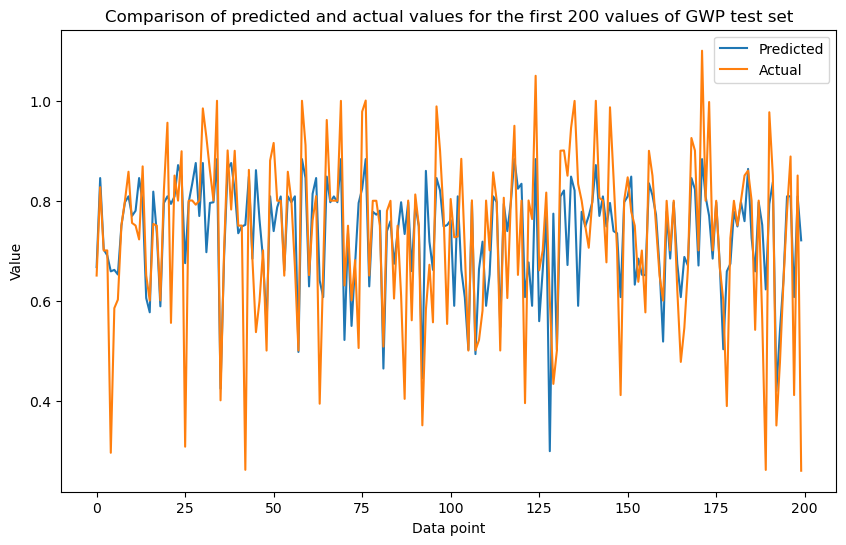

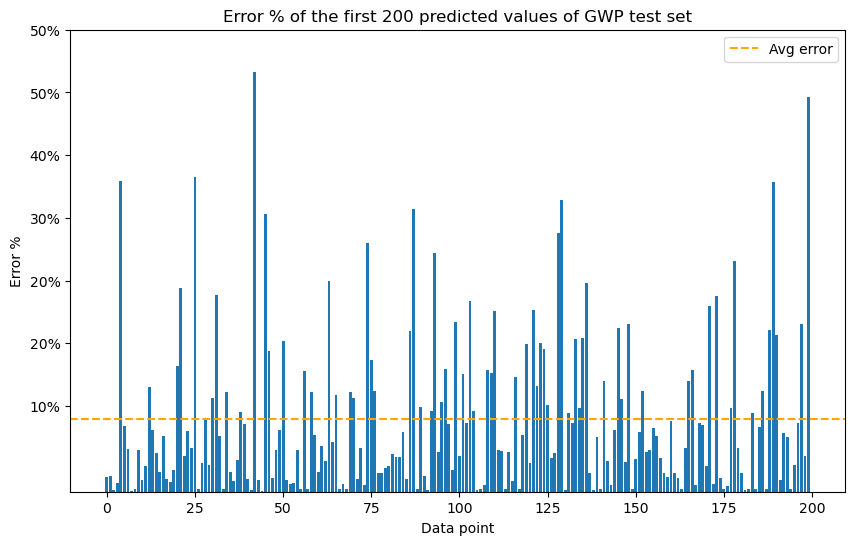

In [11]:
# Run the final model for stars dataset and show ConfusionMatrix
if __name__ == "__main__":
    gbr = GradientBoostingRegressor(n_estimators=100, max_depth=2, learning_rate=0.1, loss='huber')
    gbr.fit(x_train_gwp, y_train_gwp)
    y_pred_gwp = gbr.predict(x_test_gwp)
    gbr.score(x_test_gwp, y_test_gwp)
    
    plot_prediction_results(y_pred_gwp, y_test_gwp)
    plt.show()

## Comparing performance & Hypothesis testing

### Hypothesis testing of models for the Stars dataset
*For the classification dataset both the **SVC** and **LogisticRegression** models are classifying values with accuracy of >95%, meaning that it is hard to tell which one performs better, if any. For that purpose a hypothesis test will be conducted to first determine if the models are equivalent.*

In [21]:
svc = SVC(C=10, kernel='rbf')
svc.fit(x_train_stars, y_train_stars)
svc_scores = cross_val_score(svc, x_test_stars, y_test_stars, cv=10)
svc_pred = svc.predict(x_test_stars)

lr = LogisticRegression(C=25, penalty='l1', solver='saga')
lr.fit(x_train_stars, y_train_stars)
lr_scores = cross_val_score(lr, x_test_stars, y_test_stars, cv=10)
lr_pred = lr.predict(x_test_stars)

/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/anaconda3/envs/MLCW/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dafov/an

In [27]:
t_stat, p_value = ttest_rel(svc_scores, lr_scores)
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: -0.46032945235881895
p-value: 0.6561994459482667


Since the p-value is greater than the significance level of 0.05, it provides strong evidence to **accept** the null hypothesis, which assumes that there is no difference in performance between the SVC and LR models.

Another test (**ttest_ind**) will be performed with null hypthesis: **Ho: There is no significant difference in performance between the two models** to verify that.

In [34]:
#Finding which model is better 
t_stat, p_value = ttest_ind(svc_scores, lr_scores, equal_var=True)

if p_value < 0.05:
    if np.mean(svc_scores) > np.mean(lr_scores):
        print("The SVC model performs significantly better than the Logistic Regression model.")
    else:
        print("The Logistic Regression model performs significantly better than the SVC model.")
else:
    print("There is no significant difference in performance between the two models.")

There is no significant difference in performance between the two models.


### Hypothesis testing of models for the GWP dataset

In [35]:
svr = SVR(C=5, kernel='rbf', gamma=0.5)
svr.fit(x_train_gwp, y_train_gwp)
svr_scores = cross_val_score(svr, x_test_gwp, y_test_gwp, cv=5)

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=2, learning_rate=0.1, loss='huber')
gbr.fit(x_train_gwp, y_train_gwp)
gbr_scores = cross_val_score(gbr, x_test_gwp, y_test_gwp, cv=5)

In [37]:
t_stat, p_value = ttest_rel(svr_scores, gbr_scores)
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: -1.503888980805286
p-value: 0.2070464712983668


Since the p-value is bigger than 0.05, it provides strong evidence to **accept** the null hypothesis, which assumes that there is no difference in performance between the SVC and LR models. In other words, this means that there is a ***NO*** significant difference in the performance between the two models.